In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading and Cleaning

In [22]:
#Loading the data
df=pd.read_csv(r'C:\Users\Rajakanthan\Documents\Datastorm\credit_card_default_train.csv')

In [23]:
#Check the columns
df.columns

Index(['Client_ID', 'Balance_Limit_V1', 'Gender', 'EDUCATION_STATUS',
       'MARITAL_STATUS', 'AGE', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP',
       'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC', 'Average Paid', 'Average Due', 'NEXT_MONTH_DEFAULT',
       'Total Paid', 'Total Due', 'Unnamed: 29'],
      dtype='object')

In [24]:
df.head()

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,...,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,Average Paid,Average Due,NEXT_MONTH_DEFAULT,Total Paid,Total Due,Unnamed: 29
0,A2,1M,M,Graduate,Other,31-45,-1,-1,-1,-1,...,39418,162772,0,538165,149271.8,33474.833333,0,749796,200849,-548947.0
1,A3,1M,F,High School,Other,Less than 30,0,-1,-1,-1,...,43530,80811,942,33666,41029.8,130174.666667,0,356967,781048,424081.0
2,A4,100K,F,High School,Single,31-45,4,3,2,2,...,0,0,0,0,0.0,8040.000000,1,0,48240,48240.0
3,A5,200K,F,Graduate,Single,31-45,2,0,0,0,...,3696,4620,4049,3918,4034.6,96483.333333,1,24028,578900,554872.0
4,A6,1M,F,Graduate,Other,31-45,2,2,0,0,...,16170,17325,16401,17325,17602.2,435555.166667,0,88011,2613331,2525320.0


In [25]:
#Check for null values
df.isnull().sum()

Client_ID                 0
Balance_Limit_V1          0
Gender                    0
EDUCATION_STATUS          0
MARITAL_STATUS            0
AGE                       0
PAY_JULY                  0
PAY_AUG                   0
PAY_SEP                   0
PAY_OCT                   0
PAY_NOV                   0
PAY_DEC                   0
DUE_AMT_JULY              0
DUE_AMT_AUG               0
DUE_AMT_SEP               0
DUE_AMT_OCT               0
DUE_AMT_NOV               0
DUE_AMT_DEC               0
PAID_AMT_JULY             0
PAID_AMT_AUG              0
PAID_AMT_SEP              0
PAID_AMT_OCT              0
PAID_AMT_NOV              0
PAID_AMT_DEC              0
Average Paid              0
Average Due               0
NEXT_MONTH_DEFAULT        0
Total Paid                0
Total Due                 0
Unnamed: 29           23909
dtype: int64

In [26]:
#check for duplicates
duplicated=df.duplicated().sum()
duplicated

0

In [27]:
#changing credit limit to numeric
df['balance_unclean']=(df['Balance_Limit_V1'].str.strip().str.findall(r'[0-9]*')).apply(lambda x:''.join(x))
df['balance_thousand']=df['Balance_Limit_V1'].str.strip().str.replace(r'[0-9.]*','')
df['balance_limit_clean']=0
df.loc[df['balance_thousand']=='K','balance_limit_clean']=df['balance_unclean'].astype(int)*1000
df.loc[df['balance_thousand']=='M','balance_limit_clean']=df['balance_unclean'].astype(int)*100000
df['balance_limit_clean']=df['balance_limit_clean'].astype(str)
df=df.drop(['balance_thousand','balance_unclean'],axis=1)


In [28]:
#Change Age to more understandable categories
print(df.AGE.unique())
df['Age_cat']=df['AGE']
df['Age_cat']=df['Age_cat'].str.replace('Less than 30','Young')
df['Age_cat']=df['Age_cat'].str.replace('31-45','Lower Middle Age')
df['Age_cat']=df['Age_cat'].str.replace('46-65','Upper Middle Age')
df['Age_cat']=df['Age_cat'].str.replace('More than 65','Old')
df['Age_cat']=df['Age_cat'].astype(str)

['31-45' 'Less than 30' '46-65' 'More than 65']


In [29]:
# function to categorize payment category
def payment_category(x):
    if x<10000:
        return 'less than 10000'
    else :
        return 'more than 10000'
    

In [30]:
#Categorize payment category
df['Average_paid']=df[['PAID_AMT_JULY','PAID_AMT_AUG','PAID_AMT_SEP','PAID_AMT_OCT','PAID_AMT_NOV','PAID_AMT_DEC']].mean(axis=1)
df['Average_paid']=df['Average_paid'].apply(lambda x:payment_category(x))

In [31]:
# function to categorize netpayable as a % of credit limit
def pct_to_cat(x):
    if x<1:
        return 'within limit'
    else:
        return 'exceeded limit'


In [32]:
#computation of netpayable every three months as a % of credit limit
df['pct_3_months']=((df[['DUE_AMT_JULY','DUE_AMT_AUG','DUE_AMT_OCT']].mean(axis=1)-df[['PAID_AMT_JULY','PAID_AMT_AUG','PAID_AMT_SEP']].mean(axis=1))/df['balance_limit_clean'].astype(int)).apply(lambda x:pct_to_cat(x))
df['pct_3_6_months']=((df[['DUE_AMT_OCT','DUE_AMT_NOV','DUE_AMT_DEC']].mean(axis=1)-df[['PAID_AMT_OCT','PAID_AMT_NOV','PAID_AMT_DEC']].mean(axis=1))/df['balance_limit_clean'].astype(int)).apply(lambda x:pct_to_cat(x))                                            
                                                                                   

In [33]:
#Function to compute average spending as a % of credit limit
def due_pct_cat(x):
    x=float(x)
    if x<0.01:
        return 'less than 1%'
    if x>0.9:
        return 'more than 90%'
    else:
        return 'between 1% and 90%'

In [34]:
#Computing Average Spending as a % of credit limit
df['Average_due']=df[['DUE_AMT_JULY','DUE_AMT_AUG','DUE_AMT_SEP','DUE_AMT_OCT','DUE_AMT_NOV','DUE_AMT_DEC']].mean(axis=1)
df['Average_due_pct_cat']=(df['Average_due']/df['balance_limit_clean'].astype(int)).apply(lambda x:due_pct_cat(x))
df['Average_due_pct_cat'].value_counts()

between 1% and 90%    18450
less than 1%           3018
more than 90%          2532
Name: Average_due_pct_cat, dtype: int64

In [35]:
#Extracting cleaned columns
df_clean=df[['Gender','MARITAL_STATUS','Age_cat','EDUCATION_STATUS','balance_limit_clean','PAY_JULY','PAY_AUG','PAY_SEP','PAY_OCT','PAY_NOV','PAY_DEC',
             'PAID_AMT_JULY', 'PAID_AMT_AUG','PAID_AMT_SEP','PAID_AMT_OCT','PAID_AMT_NOV','PAID_AMT_DEC',
             'DUE_AMT_JULY','DUE_AMT_AUG','DUE_AMT_SEP','DUE_AMT_OCT','DUE_AMT_NOV','DUE_AMT_DEC','Average_paid','Average_due_pct_cat',
             'NEXT_MONTH_DEFAULT','pct_3_months','pct_3_6_months']]


# Visualization

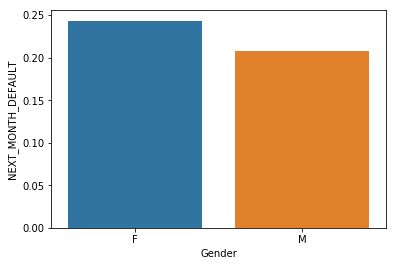

In [22]:
#Defalt rate by gender 
df_gender=df_clean[['Gender','NEXT_MONTH_DEFAULT']].groupby('Gender').mean()
sns.barplot(x=df_gender.index,y='NEXT_MONTH_DEFAULT',data=df_gender)

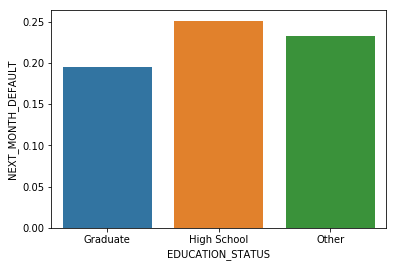

In [23]:
#Default rate by educational status
df_ed_status=df_clean[['EDUCATION_STATUS','NEXT_MONTH_DEFAULT']].groupby('EDUCATION_STATUS').mean()
sns.barplot(x=df_ed_status.index,y='NEXT_MONTH_DEFAULT',data=df_ed_status)

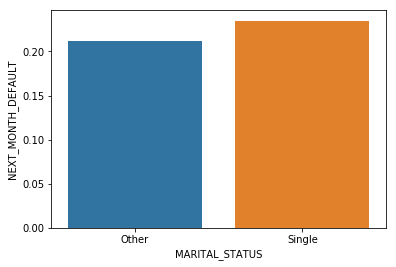

In [24]:
#Default rate by maritial status
df_marriage=df_clean[['MARITAL_STATUS','NEXT_MONTH_DEFAULT']].groupby('MARITAL_STATUS').mean()
sns.barplot(x=df_marriage.index,y='NEXT_MONTH_DEFAULT',data=df_marriage)

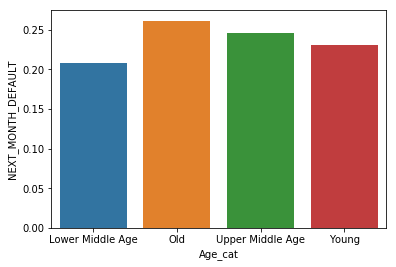

In [25]:
#default rate by age
df_age=df_clean[['Age_cat','NEXT_MONTH_DEFAULT']].groupby('Age_cat').mean()
sns.barplot(x=df_age.index,y='NEXT_MONTH_DEFAULT',data=df_age)

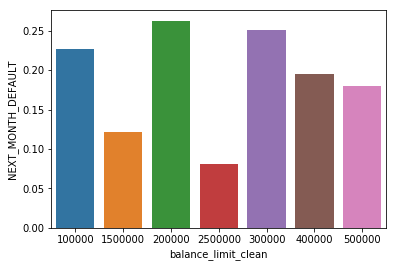

In [26]:
#default rate by credit limit
df_balance=df_clean[['balance_limit_clean','NEXT_MONTH_DEFAULT']].groupby('balance_limit_clean').mean()
sns.barplot(x=df_balance.index,y='NEXT_MONTH_DEFAULT',data=df_balance)

In [1]:
#default rate by credit card spending
"""
Do customers who spend very high levels or very low lvels of their credit limit have a different chance of defaulting?
"""
df_due_pct=df[['Average_due_pct_cat','NEXT_MONTH_DEFAULT']].groupby('Average_due_pct_cat').mean()
sns.barplot(x=df_due_pct.index,y='NEXT_MONTH_DEFAULT',data=df_due_pct)

NameError: name 'df' is not defined

In [ ]:
#Does average balance outstanding differ differ between customers who will default and those who wont?
df['Average_diff']=df[['DUE_AMT_JULY','DUE_AMT_AUG','DUE_AMT_SEP','DUE_AMT_OCT','DUE_AMT_NOV','DUE_AMT_DEC']].mean(axis=1)-df[['PAID_AMT_JULY','PAID_AMT_AUG','PAID_AMT_SEP','PAID_AMT_OCT','PAID_AMT_NOV','PAID_AMT_DEC']].mean(axis=1)
fig,ax=plt.subplots(2,1,figsize=(8,6))
sns.distplot(df.loc[df['NEXT_MONTH_DEFAULT']==1]['Average_diff'],ax=ax[0])
sns.distplot(df.loc[df['NEXT_MONTH_DEFAULT']==1]['Average_diff'],ax=ax[1])


# Data Preprocessing

In [27]:
#Get dummies
df_dummy=pd.get_dummies(df_clean)

In [28]:
df_dummy.head()

,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,...,balance_limit_clean_500000,Average_paid_less than 10000,Average_paid_more than 10000,Average_due_pct_cat_between 1% and 90%,Average_due_pct_cat_less than 1%,Average_due_pct_cat_more than 90%,pct_3_months_exceeded limit,pct_3_months_within limit,pct_3_6_months_exceeded limit,pct_3_6_months_within limit
0,-1,-1,-1,-1,-1,-1,3437,6004,39418,162772,...,0,0,1,1,0,0,0,1,0,1
1,0,-1,-1,-1,-1,0,151818,46200,43530,80811,...,0,0,1,0,0,1,1,0,0,1
2,4,3,2,2,-2,-2,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
3,2,0,0,0,0,0,3855,3890,3696,4620,...,0,1,0,1,0,0,0,1,0,1
4,2,2,0,0,0,0,0,20790,16170,17325,...,0,0,1,0,0,1,1,0,1,0


In [29]:
df_dummy.columns

Index(['PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC',
       'PAID_AMT_JULY', 'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT',
       'PAID_AMT_NOV', 'PAID_AMT_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG',
       'DUE_AMT_SEP', 'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC',
       'NEXT_MONTH_DEFAULT', 'Gender_F', 'Gender_M', 'MARITAL_STATUS_Other',
       'MARITAL_STATUS_Single', 'Age_cat_Lower Middle Age', 'Age_cat_Old',
       'Age_cat_Upper Middle Age', 'Age_cat_Young',
       'EDUCATION_STATUS_Graduate', 'EDUCATION_STATUS_High School',
       'EDUCATION_STATUS_Other', 'balance_limit_clean_100000',
       'balance_limit_clean_1500000', 'balance_limit_clean_200000',
       'balance_limit_clean_2500000', 'balance_limit_clean_300000',
       'balance_limit_clean_400000', 'balance_limit_clean_500000',
       'Average_paid_less than 10000', 'Average_paid_more than 10000',
       'Average_due_pct_cat_between 1% and 90%',
       'Average_due_pct_cat_less than 1%', 'Average_due_pct

In [30]:
#Seperate dependant and independant variables
y=df_dummy['NEXT_MONTH_DEFAULT']
X=df_dummy.drop('NEXT_MONTH_DEFAULT',axis=1)
variable_y='NEXT_MONTH_DEFAULT'
variable_x=X.columns

In [31]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.075, random_state=0)

# **Feature Selection**

In [32]:
#import algorithm
from sklearn.feature_selection import SelectKBest

In [33]:
#initiate and fit algorithm
fs = SelectKBest( k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)


In [34]:
#match importance score to variable names
variable_score={}
for i in range( len(fs.scores_)):
    variable_score[variable_x[i]]=fs.scores_[i]
variable_score

{'PAY_JULY': 2642.790262503302,
 'PAY_AUG': 1622.1284775520653,
 'PAY_SEP': 1249.1761809546672,
 'PAY_OCT': 1050.5349162172563,
 'PAY_NOV': 940.340121702299,
 'PAY_DEC': 796.0613544411107,
 'PAID_AMT_JULY': 114.78141392951214,
 'PAID_AMT_AUG': 74.28993198144681,
 'PAID_AMT_SEP': 75.24751050650634,
 'PAID_AMT_OCT': 70.31460631317492,
 'PAID_AMT_NOV': 68.50064131201925,
 'PAID_AMT_DEC': 57.22945366343039,
 'DUE_AMT_JULY': 7.231599992297456,
 'DUE_AMT_AUG': 4.152330952057573,
 'DUE_AMT_SEP': 4.186835126406865,
 'DUE_AMT_OCT': 1.8003999156576695,
 'DUE_AMT_NOV': 1.0850213392049597,
 'DUE_AMT_DEC': 0.7141724959278681,
 'Gender_F': 35.631866505161746,
 'Gender_M': 35.631866505165554,
 'MARITAL_STATUS_Other': 14.317630811213723,
 'MARITAL_STATUS_Single': 14.317630811210051,
 'Age_cat_Lower Middle Age': 29.00338157536927,
 'Age_cat_Old': 0.989073963362908,
 'Age_cat_Upper Middle Age': 16.17085647506598,
 'Age_cat_Young': 5.698229346952632,
 'EDUCATION_STATUS_Graduate': 52.11487967563104,
 'EDU

In [35]:
#drop columns with low importance
column_drop=[]
for k,v in variable_score.items():
    if v<15:
        X_train=X_train.drop(k,axis=1)
        X_test=X_test.drop(k,axis=1)
        column_drop.append(k)
column_drop  

['DUE_AMT_JULY',
 'DUE_AMT_AUG',
 'DUE_AMT_SEP',
 'DUE_AMT_OCT',
 'DUE_AMT_NOV',
 'DUE_AMT_DEC',
 'Age_cat_Old',
 'Age_cat_Young',
 'balance_limit_clean_100000',
 'balance_limit_clean_2500000',
 'Average_due_pct_cat_between 1% and 90%']

In [36]:
X_train.shape

(22200, 34)

In [37]:
#get new column name list
variable_x=X_train.columns

## Balancing the training set 

In [ ]:
#get the value counts
X_train['NEXT_MONTH_DEFAULT'].value_counts()

Since the training set is imbalanced we will be using the models given by imblearn library to balance the dataset

In [38]:
#import library
from imblearn.combine import SMOTETomek

Using TensorFlow backend.


In [39]:
#initiate and fit algorithm
smote_tomek = SMOTETomek(random_state=0)
X_train, y_train = smote_tomek.fit_resample(X_train, y_train)
X_train.shape

(33092, 34)

# Fit the XGBoost algorithm

In [40]:
#import library
import xgboost as xgb

In [41]:
#fit model
"""
scale_pos+weight has been set to slightly lower than 1 to adjust for the slight overfitted bias towards 1 caused 
by the addition of the variable 'Average_due_pct_cat'
"""
model = xgb.XGBClassifier(objective= 'binary:logistic',nthread=4,seed=42,verbosity=0,scale_pos_weight=0.97)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.975, seed=42,
              silent=None, subsample=1, verbosity=0)

In [42]:
#predict for test set
y_pred_xgb = model.predict(X_test)

In [43]:
#get the classification report
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1409
           1       0.58      0.43      0.50       391

    accuracy                           0.81      1800
   macro avg       0.72      0.67      0.69      1800
weighted avg       0.79      0.81      0.80      1800



In [44]:
#get accuracy score to high %
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test, y_pred_xgb)
score

0.81